

```
# This is formatted as code
```

# Linear Regression

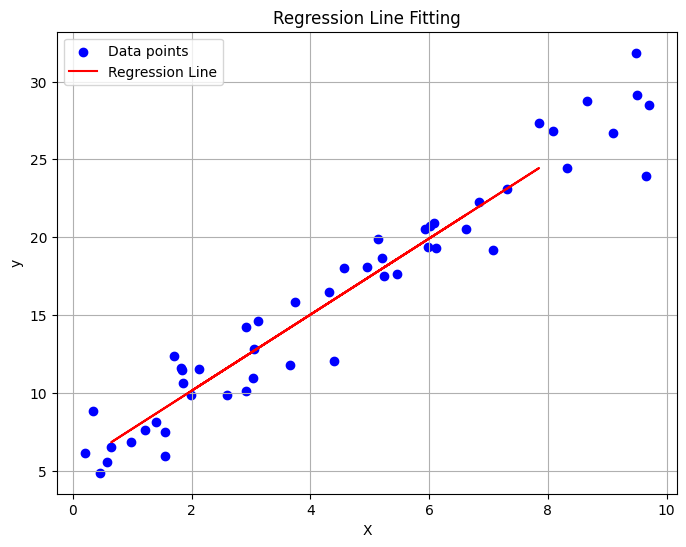

Regression equation: y = 2.44 * X + 5.25
Linear Regression - MAE: 1.367682745509643, RMSE: 1.7847180869440804, MAPE: 9.061809086192154%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Generate random data
np.random.seed(42)  # For reproducibility
X = np.random.rand(50, 1) * 10  # 50 random numbers between 0 and 10
y = 2.5 * X + 5 + np.random.randn(50, 1) * 2  # Linear relation with some noise

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plotting the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Line Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print regression equation
print(f"Regression equation: y = {model.coef_[0][0]:.2f} * X + {model.intercept_[0]:.2f}")

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Linear Regression - MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

# Polynomial Regression

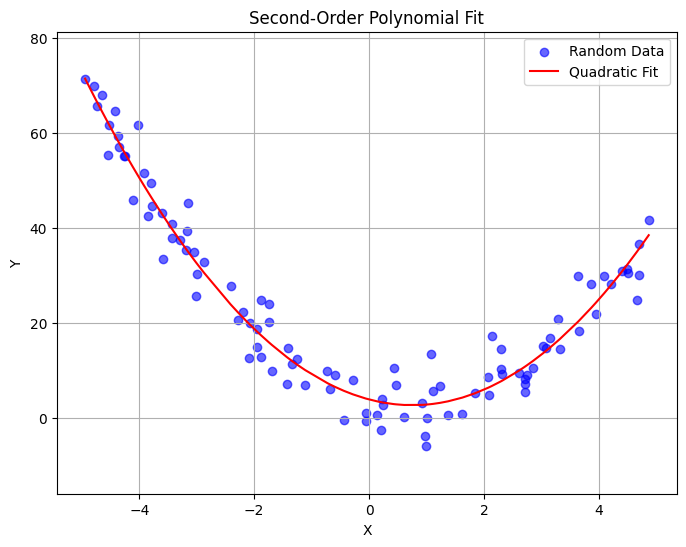

Quadratic equation: y = 2.12 * x^2 + -3.20 * x + 3.91


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate random data for x ranging from -5 to 5
np.random.seed(42)
x = np.random.rand(100, 1) * 10 - 5  # Random values between -5 and 5
y = 2 * x**2 - 3 * x + 5 + np.random.randn(100, 1) * 5  # Quadratic relationship with noise

# Transform x for polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

# Fit a quadratic regression model
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

# Plot the data and the quadratic fit
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Random Data', zorder=1)
sorted_indices = np.argsort(x, axis=0).flatten()
plt.plot(x[sorted_indices], y_pred[sorted_indices], color='red', label='Quadratic Fit', zorder=2)
plt.title('Second-Order Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(min(y) - 10, max(y) + 10)  # Adjust the y-axis range
plt.legend()
plt.grid(True)
plt.show()

# Print the quadratic equation
coefficients = model.coef_
intercept = model.intercept_
print(f"Quadratic equation: y = {coefficients[0][1]:.2f} * x^2 + {coefficients[0][0]:.2f} * x + {intercept[0]:.2f}")

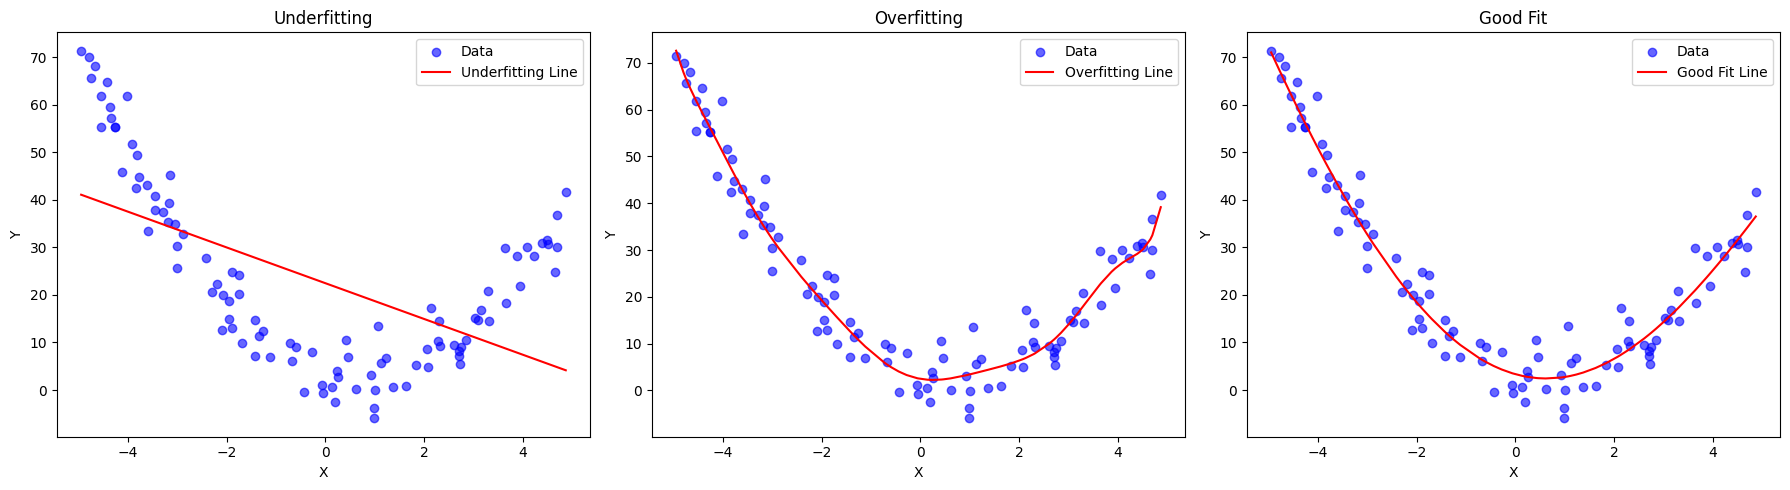

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
np.random.seed(42)
x = np.random.rand(100, 1) * 10 - 5  # Random x values between -5 and 5
y = 2 * x**2 - 3 * x + 5 + np.random.randn(100, 1) * 5  # Quadratic relationship with noise

# # Transform x for polynomial features
# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# x_poly = poly_features.fit_transform(x)

# Underfitting: Linear regression (degree=1)
poly_underfit = PolynomialFeatures(degree=1, include_bias=False)
x_poly_underfit = poly_underfit.fit_transform(x)
model_underfit = LinearRegression().fit(x_poly_underfit, y)
y_pred_underfit = model_underfit.predict(x_poly_underfit)

# Overfitting: High-degree polynomial regression (degree=10)
poly_overfit = PolynomialFeatures(degree=10, include_bias=False)
x_poly_overfit = poly_overfit.fit_transform(x)
model_overfit = LinearRegression().fit(x_poly_overfit, y)
y_pred_overfit = model_overfit.predict(x_poly_overfit)

# Good fit: Quadratic regression (degree=2)
poly_goodfit = PolynomialFeatures(degree=4, include_bias=False)
x_poly_goodfit = poly_goodfit.fit_transform(x)
model_goodfit = LinearRegression().fit(x_poly_goodfit, y)
y_pred_goodfit = model_goodfit.predict(x_poly_goodfit)

# Plotting
plt.figure(figsize=(18, 5))

# Underfitting
plt.subplot(1, 3, 1)
plt.scatter(x, y, color="blue", alpha=0.6, label="Data")
sorted_idx = np.argsort(x.flatten())
plt.plot(x[sorted_idx], y_pred_underfit[sorted_idx], color="red", label="Underfitting Line")
plt.title("Underfitting")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Overfitting
plt.subplot(1, 3, 2)
plt.scatter(x, y, color="blue", alpha=0.6, label="Data")
plt.plot(x[sorted_idx], y_pred_overfit[sorted_idx], color="red", label="Overfitting Line")
plt.title("Overfitting")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Good fit
plt.subplot(1, 3, 3)
plt.scatter(x, y, color="blue", alpha=0.6, label="Data")
plt.plot(x[sorted_idx], y_pred_goodfit[sorted_idx], color="red", label="Good Fit Line")
plt.title("Good Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()

# Regularization

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X = data.data[:, :6]  # Select 6 features to induce overfitting
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear, Ridge, and Lasso Regression
models = {
    "Linear Regression": LinearRegression(),
    "Lasso (alpha=1)": Lasso(alpha=0.1), # L1
    "Ridge (alpha=1)": Ridge(alpha=1) # L2
}

# Store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = mean_squared_error(y_test, y_pred)

# Print MSE for comparison
for model, mse in results.items():
    print(f"{model}: MSE = {mse:.2f}")


# Linear Regression: MSE = 3697.49
# Lasso (alpha=1): MSE = 3703.15
# Ridge (alpha=1): MSE = 3697.32


Linear Regression: MSE = 3697.49
Lasso (alpha=1): MSE = 3699.83
Ridge (alpha=1): MSE = 3695.86


# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features & Labels

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# # Accuracy Score
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Classification Report
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# plt.show()

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [ ]:

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



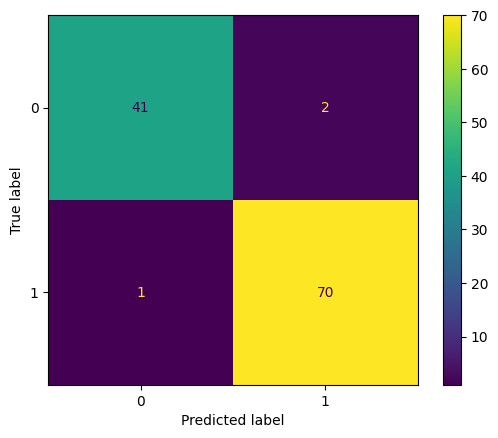

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [ ]:
# data_augmenter = ImageDataGenerator(
#     rotation_range=20,          # Randomly rotate images by up to 20 degrees
#     width_shift_range=0.2,      # Randomly shift images horizontally by up to 20% of the width
#     height_shift_range=0.2,     # Randomly shift images vertically by up to 20% of the height
#     shear_range=0.2,            # Apply shearing transformations
#     zoom_range=0.2,             # Randomly zoom in on images by up to 20%
#     horizontal_flip=True,       # Randomly flip images horizontally
#     fill_mode='nearest'         # Strategy for filling in newly created pixels
# )
